<a href="https://colab.research.google.com/github/aritro66/Wine-Quality-Prediction/blob/main/WineQualityPredictiion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

Collecting and Processing Data

In [3]:
# Loading the dataset using Pandas function
wine_data = pd.read_csv('/content/winequality-red.csv')

In [5]:
# Checking data of first 5 rows
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Checking data of last 5 rows
wine_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [8]:
# No. of rows and columns
wine_data.shape

(1599, 12)

In [9]:
# Analysing data
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
# Getting basic information about data
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
# Finding missing values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
# number of values for each quality
wine_data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

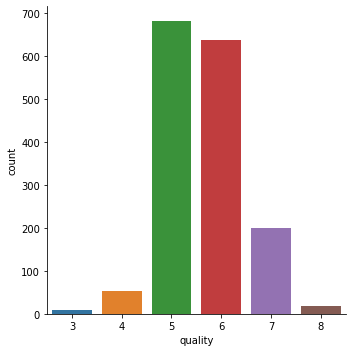

In [18]:
# ploting frequency graph
sns.catplot(x='quality', data=wine_data, kind = 'count')

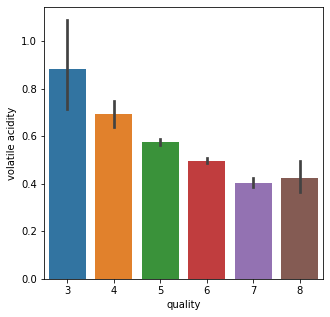

In [23]:
# volatile acidity vs quantity
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_data)

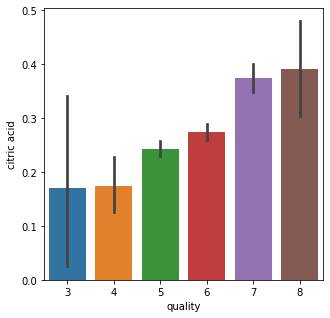

In [25]:
# citric acid vs quantity
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_data)

Understanding the correlation between various features in the dataset

1.Positive Correlation

2.Negative Correlation

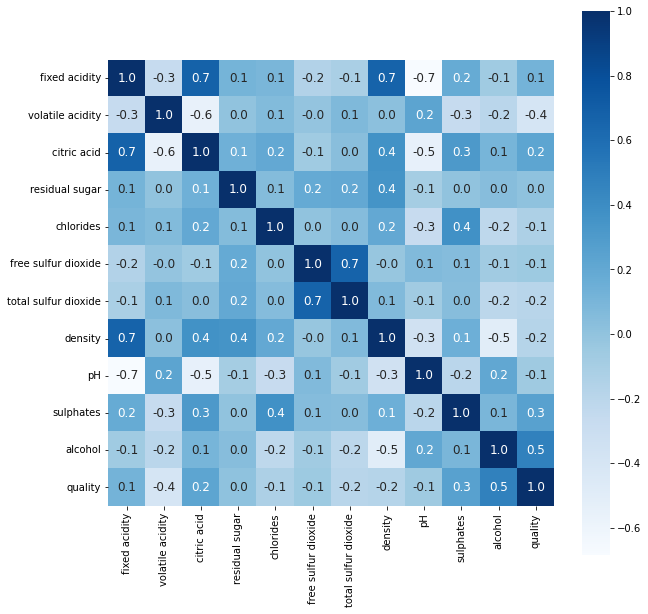

In [27]:
# constructing a heatmap to understand correlation
correlation = wine_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':12}, cmap='Blues')

In [39]:
# Separating data and labels
X = wine_data.drop(columns=['quality'],axis=1)
Y = wine_data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0) # Label Binarization
print(X.shape)
print(Y.shape)

(1599, 11)
(1599,)


Training and Testing data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Modal Training using Random Forest Classifier

In [41]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

Modal Evalution

In [42]:
# accuracy score of Training Data
train_prediction = model.predict(X_train)
print('Accuracy Score ',accuracy_score(y_train,train_prediction))

Accuracy Score  1.0


In [43]:
# accuracy score of Testing Data
test_prediction = model.predict(X_test)
print('Accuracy Score ',accuracy_score(y_test,test_prediction))

Accuracy Score  0.928125


Building a Predictive System

In [45]:
input=np.array([7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8],dtype='int32')
print(X_test.shape)
input=input.reshape([1,-1])
print(input.shape)
ans=model.predict(input)
if(ans[0]==0):
    print("Wine is not of good quality.")
else:
    print("Wine not of good quality.")



(320, 11)
(1, 11)
Wine is not of good quality.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


Correct Prediction